In [21]:
import sys
sys.path.append('../src')

from facial_expression.paths import DATASET_PATH, MODEL_PATH
print(f"Dataset path: {DATASET_PATH}")
print(f"Model path: {MODEL_PATH}")

Dataset path: /Users/sriramboddeda/Documents/GitHub/Facial-Expression-Recognition/data/dataset/fer2013.csv
Model path: /Users/sriramboddeda/Documents/GitHub/Facial-Expression-Recognition/models/Trained_Model.keras


In [22]:
import os
for dirname, _, filenames in os.walk(DATASET_PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [23]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
import pandas as pd
import numpy as np

In [24]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv(DATASET_PATH,names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [25]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [26]:
X, Y = getData(filename)
num_class = len(set(Y))
print(num_class)

7


In [27]:
X = X.reshape(-1, 48, 48, 1)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint


In [31]:
from keras.layers import Input

def my_model():
    model = Sequential()
    model.add(Input(shape=(48, 48, 1)))  # ✅ Explicit input layer

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(7, activation='softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

model = my_model()
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,279 (399.53 KB)

 Trainable params: 101,831 (397.78 KB)

 Non-trainable params: 448 (1.75 KB)

In [32]:
# fit the model
h = model.fit(
    x=X_train,     
    y=y_train, 
    batch_size=64, 
    epochs=20, 
    verbose=1, 
    validation_data=(X_test, y_test),
    shuffle=True,
    callbacks=[
        ModelCheckpoint(filepath=MODEL_PATH, save_best_only=True),
    ]
)


model.save(MODEL_PATH)

Epoch 1/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - accuracy: 0.2634 - loss: 1.8204 - val_accuracy: 0.2424 - val_loss: 1.9660
Epoch 2/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 31s 61ms/step - accuracy: 0.4289 - loss: 1.4683 - val_accuracy: 0.4244 - val_loss: 1.4383
Epoch 3/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 31s 61ms/step - accuracy: 0.4953 - loss: 1.3257 - val_accuracy: 0.4338 - val_loss: 1.4381
Epoch 4/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 31s 61ms/step - accuracy: 0.5335 - loss: 1.2343 - val_accuracy: 0.5183 - val_loss: 1.2766
Epoch 5/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 30s 59ms/step - accuracy: 0.5653 - loss: 1.1553 - val_accuracy: 0.4809 - val_loss: 1.3679
Epoch 6/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 31s 61ms/step - accuracy: 0.5833 - loss: 1.1008 - val_accuracy: 0.5132 - val_loss: 1.2467
Epoch 7/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - accuracy: 0.6075 - loss: 1.0528 - val_accuracy: 0.4606 - val_loss: 1.4196
Epoch 8/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - accuracy: 0.6164 - loss: 1.0220 - 

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict classes on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


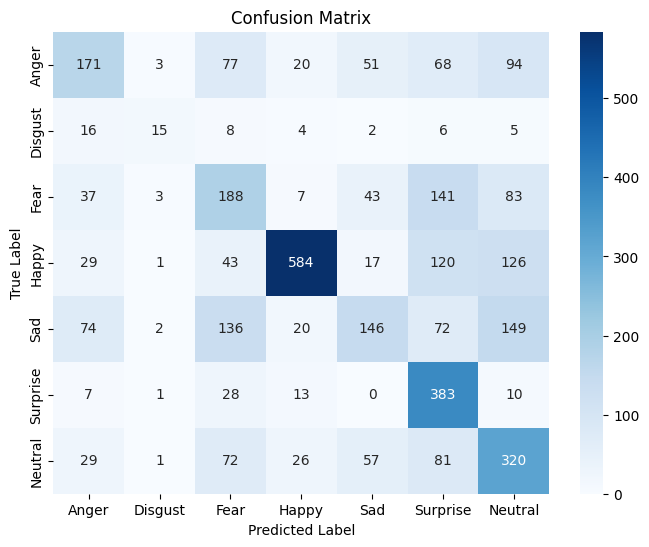

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_names = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [36]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

       Anger       0.47      0.35      0.40       484
     Disgust       0.58      0.27      0.37        56
        Fear       0.34      0.37      0.36       502
       Happy       0.87      0.63      0.73       920
         Sad       0.46      0.24      0.32       599
    Surprise       0.44      0.87      0.58       442
     Neutral       0.41      0.55      0.47       586

    accuracy                           0.50      3589
   macro avg       0.51      0.47      0.46      3589
weighted avg       0.54      0.50      0.50      3589



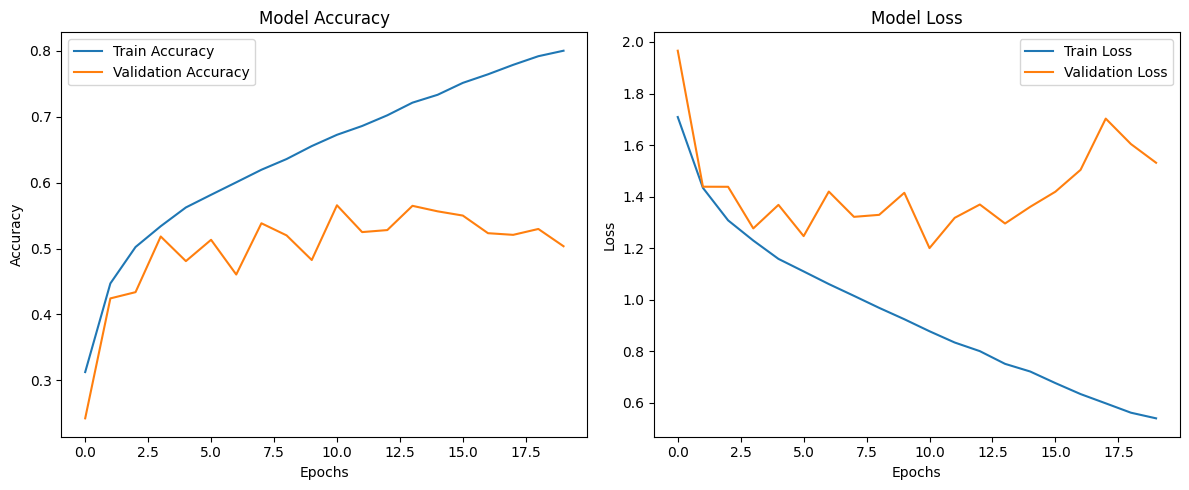

In [37]:
# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], label='Train Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], label='Train Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()
